<a href="https://colab.research.google.com/github/ebceran/basic-logistic-regression-learning-project/blob/main/basic_logistic_regression_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Katsayıları:
Age: -0.0739
Income: -0.0003
Late Payments: 2.0392
Intercept: -0.3889


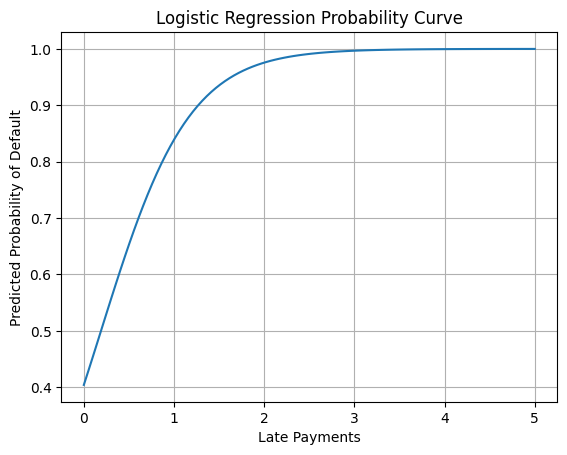

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Rastgele örnek veri
np.random.seed(0)
n = 120

age = np.random.randint(18, 70, n)
income = np.random.randint(1500, 7000, n)
late_payments = np.random.randint(0, 6, n)

# Gerçek hayata benzeyen risk kuralı
risk_score = (
    -0.03 * age +
    -0.0002 * income +
    0.9 * late_payments +
    np.random.normal(0, 0.5, n)
)

# Logistic dönüşüm
prob = 1 / (1 + np.exp(-risk_score))

# 0 veya 1'e çevirelim
y = (prob > 0.5).astype(int)

df = pd.DataFrame({
    "age": age,
    "income": income,
    "late_payments": late_payments,
    "y": y
})

# Modeli kur
model = LogisticRegression()
model.fit(df[['age', 'income', 'late_payments']], df['y'])

# Katsayılar
coef = model.coef_[0]
intercept = model.intercept_[0]

print("Model Katsayıları:")
print(f"Age: {coef[0]:.4f}")
print(f"Income: {coef[1]:.4f}")
print(f"Late Payments: {coef[2]:.4f}")
print(f"Intercept: {intercept:.4f}")

# -- Probability grafiği için Late Payments üzerinden çizelim --
x_plot = np.linspace(0,5,100)
score = (coef[2] * x_plot + intercept)
prob_plot = 1 / (1 + np.exp(-score))

plt.plot(x_plot, prob_plot)
plt.xlabel("Late Payments")
plt.ylabel("Predicted Probability of Default")
plt.title("Logistic Regression Probability Curve")
plt.grid(True)
plt.show()
